# About the dataset: 
With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. It is stated that the cost of acquiring a new customer is far more than that for retaining the existing one. Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.

# Data Source: 
https://www.kaggle.com/datasets/barun2104/telecom-churn/data

# Data columns and their meanings:
* Churn: 1 if customer cancelled service, 0 if not
* AccountWeeks: number of weeks customer has had active account
* ContractRenewal: 1 if customer recently renewed contract, 0 if not
* DataPlan: 1 if customer has data plan, 0 if not
* DataUsage: gigabytes of monthly data usage
* CustServCalls: number of calls into customer service
* DayMins: average daytime minutes per month
* DayCalls: average number of daytime calls
* MonthlyCharge: average monthly bill
* OverageFee: largest overage fee in last 12 months

# STEP 0: IMPORTING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from skimpy import skim
from summarytools import dfSummary
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
sns.set_theme()

# STEP 1: GETING THE DATASET

In [2]:
df_cc = pd.read_csv("dataset/telecom_churn.csv")

In [3]:
skim(df_cc)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3333   │ │ int64       │ 6     │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column              ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Churn               │   0 │     0 │   0.1449 │   0.3521 │   0 │      0 │      0 │      0 │      1 │ ▇    ▁ │  │
│ │ AccountWeeks        │   0 │     0 │    101.1 │    39.82 │   1 │     74 │    101 │    127 │    243 │ ▁▅▇▅▁  │  │
│ │ ContractRenewal     │   0 │     0 │   0.9031 │   0.2959 │   0 │      1 │      1 │      1 │      1 │ ▁    ▇ │  │
│ │ DataPlan            │   0 │     0 │   0.2766 │   0.4474 │   0 │      0 │      0 │      1 │      1 │ ▇    ▃ │  │
│ │ DataUsage           │   0 │     0 │   0.8165 │    1.273 │   0 │      0 │      0 │   1.78 │    5.4 │  ▇ ▁▁  │  │
│ │ CustServCalls       │   0 │     0 │    1.563 │    1.315 │   0 │      1 │      1 │      2 │      9 │  ▇▃▃   │  │
│ │ DayMins             │   0 │     0 │    179.8 │    54.47 │   0 │  143.7 │  179.4 │  216.4 │  350.8 │  ▂▇▇▃  │  │
│ │ DayCalls            │   0 │     0 │    100.4 │    20.07 │   0 │     87 │    101 │    114 │    165 │   ▃▇▅▁ │  │
│ │ MonthlyCharge       │   0 │     0 │    56.31 │    16.43 │  14 │     45 │   53.5 │   66.2 │  111.3 │ ▁▆▇▃▂  │  │
│ │ OverageFee          │   0 │     0 │    10.05 │    2.536 │   0 │   8.33 │  10.07 │  11.77 │  18.19 │  ▁▆▇▃  │  │
│ │ RoamMins            │   0 │     0 │    10.24 │    2.792 │   0 │    8.5 │   10.3 │   12.1 │     20 │  ▂▆▇▂  │  │
│ └─────────────────────┴─────┴───────┴──────────┴──────────┴─────┴────────┴────────┴────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [4]:
dfSummary(df_cc)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Churn[int64],1. 02. 1,"2,850 (85.5%)483 (14.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATBJREFUeJzt2zEKwjAYhuFEgujSUgo9TA/hYT1Eb1NKM1hxiWRwEBzzf/jD+wyO6fKqKPliKSUACjGEcA0hnCVPgxevUsrR+tA0juOt67qh9cHwK+e8xRjvrYNLNbR5no++758tD4ZP+75flmUZ1nWt33ZtY6svNbRpmh4tD4ZrV4tDTxaHAr8QG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggkz4X5nSPxD+zbCHVK8D1ZqbVhTn4k3Pe6g6h9bkMXiAbvESmfFCx/GQzeXfAL7Mpn9UcDH6ZTPks52Dwy3LKx69bfOFPXcgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtjge8rHNBDSKZ/VHAx+MXhBUHkDCltq31g+6fQAAAAASUVORK5CYII="">",0(0.0%)
2,AccountWeeks[int64],Mean (sd) : 101.1 (39.8)min < med < max:1.0 < 101.0 < 243.0IQR (CV) : 53.0 (2.5),212 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmBJREFUeJzt2z+PmmAAx3GeoheqF9HY6Mbq0KSDo0vfQV9s124d3E18B24mChrpURFpsCaeQ69FuPo7+H62G57I8A3c88+kaWoBKt7d+wGA5xpXf9WcMea9ZVkPNw7fp2n6VPIj1Q5BPoux3+9/6XQ6vVvGb7db3xjzlSiLIciLhyzGyWTy5LpulGfgZrNxptNpb7VaZW9XgiygckEW+Ox2jsdj03VdfzAY/LhhfPa7KKhSQRb57MZx7CRJ8jGKou+WZd0SJEpQqSCLfHYXi0VvPp+3DoeD/XqPh7oFeZLFmPez6/s+n1wBrENCCkFCCkFCCkFCCkFCCkFCCkFCCkFCSiUXxu8hSZJmth9ujLllOEfXzgiyBGEYNuM4/uR5nm3bdq4tywxH1y4IsgT7/b7hOE5rPB5Hw+HQzzOWo2vXCLJE7XY79x76GfvoZ0xqIIUgIaVRxVPfr/BIqGuQnPquN7kgOfVdb4pBnnDqu56Y1EAKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUKK7GmfOuEK7QVB3hlXaK8R5J1xhfYaQYrgCu1vTGpQjzckNwchEyQ3B6H2huTmIPQmNdwcRF5MaiCFICGFICGFICGFICGFrcM3LqnYSaEXg2S3RVtYwZNCfwyS3RZ9+wqeFHrpDcluyxvRrtBJob/+D8luC/4nZtmQQpCQwrJPjSWCS0YEWVNhwSWjIAh2xphvlmVFZcbc+Jflgby/ttvtTmPCMHSWy2WLsXpj1+v1Y7ZkNBqNTLfb/ZlnbBAEj7PZ7LPneR/KXv/8BbnFhH7UpRo3AAAAAElFTkSuQmCC"">",0(0.0%)
3,ContractRenewal[int64],1. 12. 0,"3,010 (90.3%)323 (9.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATVJREFUeJzt2zFqwzAARmGpmNIsNsHgw/gQPWwP4duYYA1N6aKioWOhlZJHar9vyGai4ZGQoD/mnINEiCGEUwjhGXk37cFnzvla82A3juNr3/fn259Je5RSusQY32qC60po8zxfh2H4uM/xtBfbtr0sy3Je17V8E/49tvJSQpum6f0uJ9TenGoffLrtOaSfGZswxiaMsQljbMIYmzDGJoyxCWNswhibMMYmjLEJY2zCGJswxiZM930pjntL/VetnXTlmm+5fdlyKU7HkVK6lB1CzbMOXoQNXqJTPlFaP9mqK9fxNE35WmZdOp7qKV/rrEvH0zrl8xesfs0/dYUxNmGMTRhjE8bYhDE2YYxNGGMTxtiEMTZhjE0YYxPG2IQxNmGMTY8/5XP+J3TK1zLr0vE4eFGgfAEKW2rfOMHSdgAAAABJRU5ErkJggg=="">",0(0.0%)
4,DataPlan[int64],1. 02. 1,"2,411 (72.3%)922 (27.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATVJREFUeJzt2zFuwkAURdE/yEKhsYUseTFeRBabRXg3FrILQDQT/SpFqiB4zoN7irSM5Bsg0bxSaw1AoUTEISL2klfDM9xqrZcw0PR9/9m27XHrg+A+67qeSilfDsE1Gdo4jpeu665bHwZ/syzLxzRNx3me85Pp/8eWPzK0YRjOWx8Gd8mvQRZ2Wx8A74PYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAbtfba8hKd7STyK23Nr8lpx3vZ0uoSHH/n8cocQBhi8+Ls57A9SYcoHFbd3NpvfYphP+ZxmazCe8rnN1uA/5eMvZmP8UxcyxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yNhM+RzOiBea8jnN1vAbgxeEyjcKW2rfBvQYKAAAAABJRU5ErkJggg=="">",0(0.0%)
5,DataUsage[float64],Mean (sd) : 0.8 (1.3)min < med < max:0.0 < 0.0 < 5.4IQR (CV) : 1.8 (0.6),174 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmJJREFUeJzt172O2kAYRuGZwCIvEI/4kem4gZVSING4T8q92G3TpaDYmjugQUjIYMHiYIwjd4kUrTIGiTfsefrxjKzj+WRblqUBVHy69QGA3zXNO6y1j8aYlqnnWJbloeZafFDN92IcDAbPYRj26jw4TdPEWvtClLjWDdmqYozj+OCcy3weut1ug9ls1luv19XtSpC4zsiuVDFGUfRm/FXjHvDCTw2kECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECS

# STEP 2: EDA

# The data is mixed together and with the less amount of churns, 

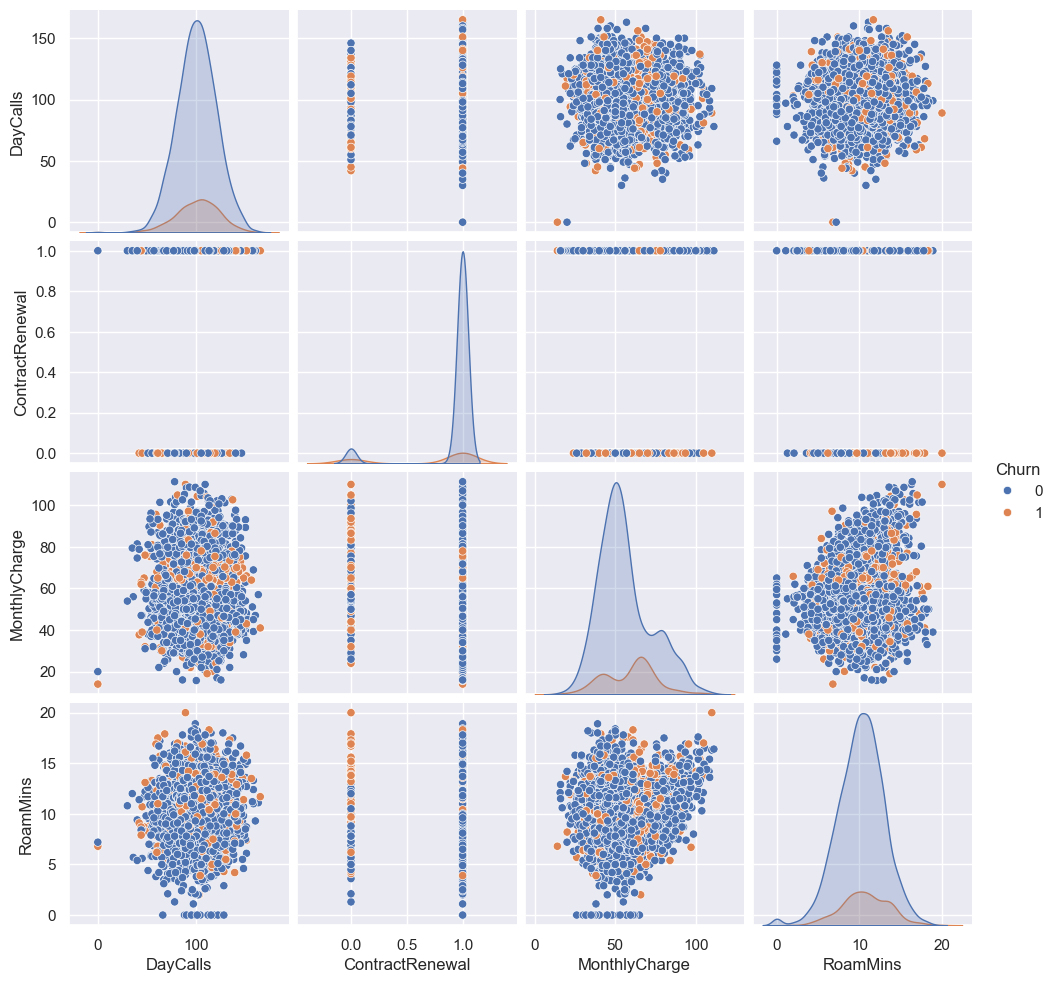

In [5]:
sns.pairplot(data = df_cc, vars=['DayCalls', 'ContractRenewal', 'MonthlyCharge', 'RoamMins'], hue='Churn')

# We can see that there is data imbalance

<Axes: xlabel='Churn', ylabel='count'>

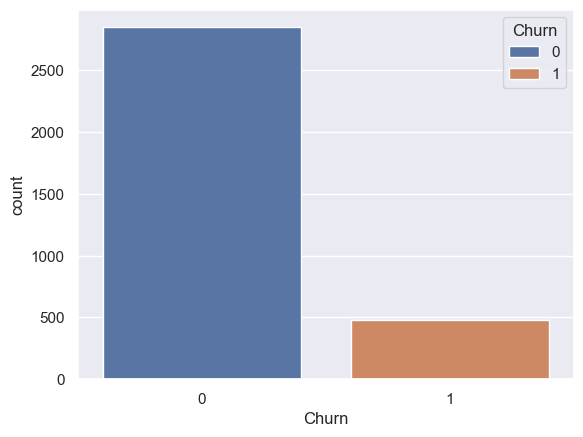

In [6]:
sns.countplot(data= df_cc, x='Churn', hue = 'Churn')

<Axes: ylabel='count'>

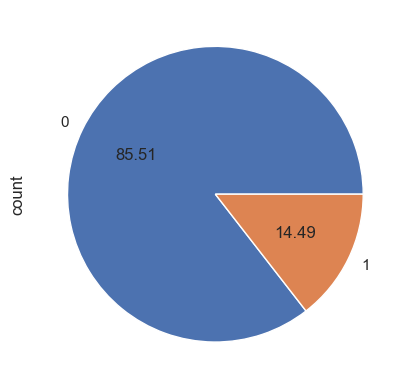

In [7]:
df_cc['Churn'].value_counts().plot.pie(autopct = '%.2f')

[Text(0.5, 1.0, 'Correlation between the features')]

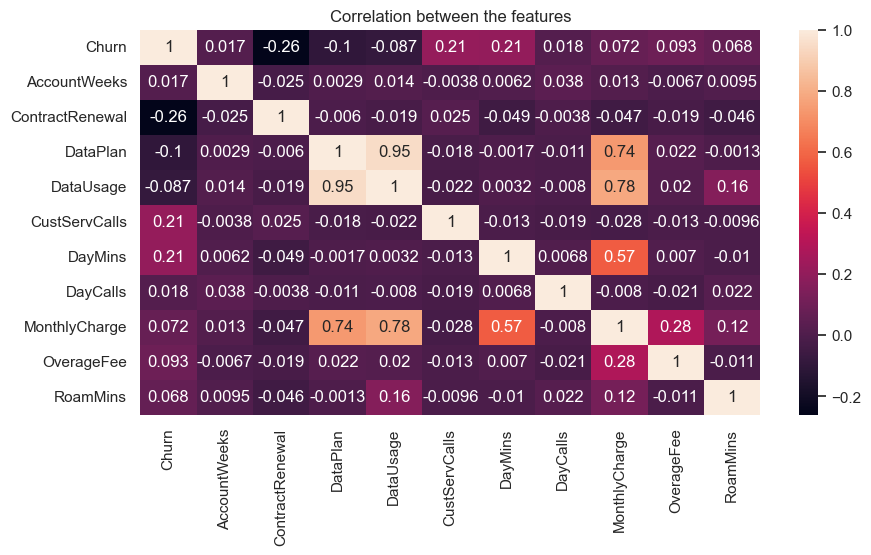

In [8]:
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(df_cc.corr(), annot = True)
ax.set(title = 'Correlation between the features')

<Axes: xlabel='DataUsage', ylabel='MonthlyCharge'>

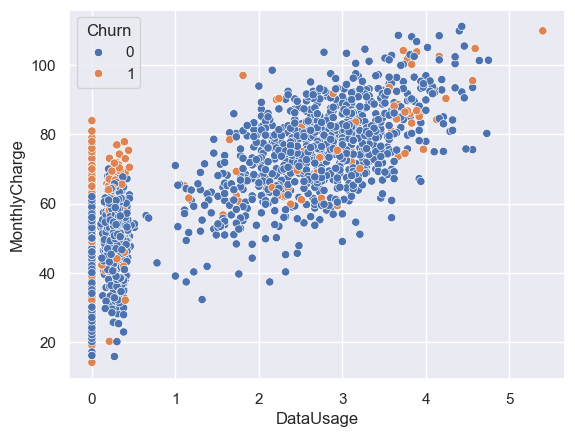

In [9]:
sns.scatterplot(data = df_cc, x = 'DataUsage', y = 'MonthlyCharge', hue = 'Churn')

In [10]:
X = df_cc.drop(labels = {'Churn'}, axis = 1)
y = df_cc['Churn']

In [11]:
# Radom Undersampling

ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X,y)


[Text(0.5, 1.0, 'Over-Sampling Result')]

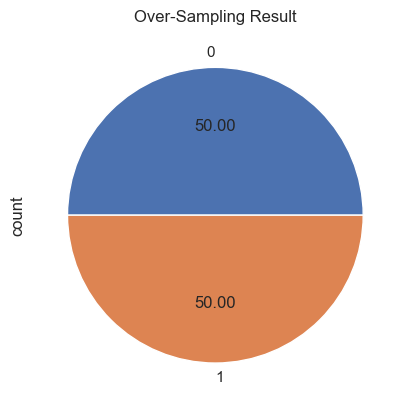

In [12]:
ax = y_res.value_counts().plot.pie(autopct = '%.2f')
ax.set(title = 'Over-Sampling Result')

In [13]:
X_res.shape

(5700, 10)

In [14]:
y_res.shape

(5700,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [16]:
clf = LogisticRegression(random_state = 42)
clf.fit(X_train, y_train)

c:\Users\hassa\File_Hub\Documents\Projects\Customer-Churn\customer-churn\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

# Model Testing

In [17]:
initial_predicted_y = clf.predict(X_test)

In [18]:
# Classification report for evaluating the model

print(classification_report(y_pred=initial_predicted_y, y_true=y_test))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       585
           1       0.75      0.74      0.75       555

    accuracy                           0.75      1140
   macro avg       0.75      0.75      0.75      1140
weighted avg       0.75      0.75      0.75      1140



In [19]:
initial_cm = confusion_matrix(y_pred=initial_predicted_y, y_true = y_test)

<Axes: >

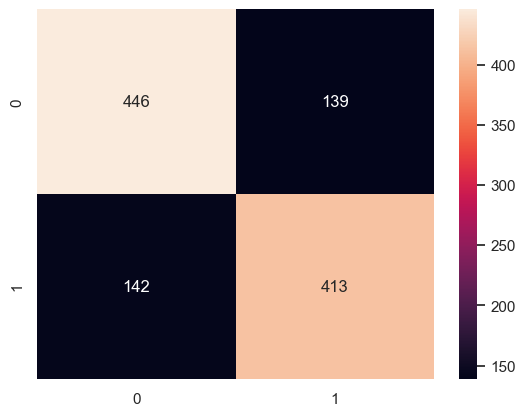

In [20]:
sns.heatmap(data = initial_cm, annot=True, fmt = 'd')

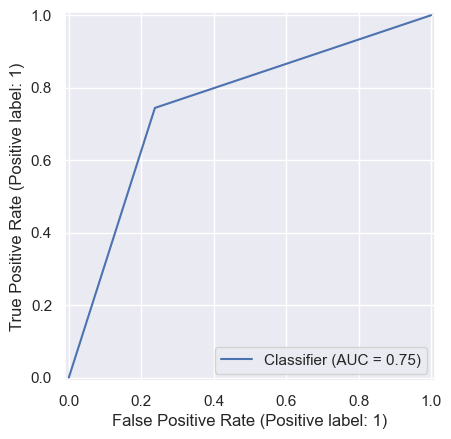

In [21]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_true = y_test, y_pred = initial_predicted_y)

# Evaluating the model even further using statistic (without oversampling)

In [22]:
y_res.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [23]:
import statsmodels.api as sm

x = sm.add_constant(X)

In [24]:
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.328291
         Iterations 7


# We see that the following:
* AccountWeeks, DataUsage, DayMins, Monthly charge and OverageFee can be removed as it doesn't contribute much to the model as we see the the p value is < 0.05 so we reject the initial hypothesis! 
* McFadden R Squared (Pseudo R-sqquared) came at 0.2 which is a good sign!
* We see the difference model with oversampling vs without oversampling.

In [25]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3322
Method:                           MLE   Df Model:                           10
Date:                Thu, 15 May 2025   Pseudo R-squ.:                  0.2066
Time:                        18:43:41   Log-Likelihood:                -1094.2
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                4.910e-116
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.9510      0.549    -10.845      0.000      -7.026      -4.876
AccountWeeks        0.0007      0.001      0.470      0.638      -0.002       0.003
ContractRenewal    -1.9855      0.144    -13.825      0.000      -2.267      -1.704
DataPlan           -1.1842      0.536     -2.207      0.027      -2.236      -0.133
DataUsage           0.3637      1.923      0.189      0.850      -3.406       4.133
CustServCalls       0.5081      0.039     13.039      0.000       0.432       0.585
DayMins             0.0174      0.032      0.537      0.591      -0.046       0.081
DayCalls            0.0037      0.003      1.328      0.184      -0.002       0.009
MonthlyCharge      -0.0276      0.191     -0.144      0.885      -0.402       0.347
OverageFee          0.1868      0.326      0.574      0.566      -0.452       0.825
RoamMins            0.0789      0.022      3.579      0.000       0.036       0.122
===================================================================================
"""

In [26]:
X_test_1 = sm.add_constant(X_test)
y_pred_prob_1 = results_log.predict(X_test_1)
y_pred_1 = (y_pred_prob_1 >= 0.5).astype(int)
print("Second Model:", classification_report(y_test, y_pred_1))

Second Model:               precision    recall  f1-score   support

           0       0.56      0.98      0.72       585
           1       0.92      0.20      0.33       555

    accuracy                           0.60      1140
   macro avg       0.74      0.59      0.52      1140
weighted avg       0.74      0.60      0.53      1140



In [27]:
X = df_cc.drop(labels=['AccountWeeks', 'DataUsage', 'OverageFee', 'MonthlyCharge', 'DayCalls','DayMins', 'Churn'], axis = 1)
y = df_cc['Churn']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X.head()

,ContractRenewal,DataPlan,CustServCalls,RoamMins
0,1,1,1,10.0
1,1,1,1,13.7
2,1,0,0,12.2
3,0,0,2,6.6
4,0,0,3,10.1


In [30]:
x_evaluation = sm.add_constant(X)

In [31]:
reg_log = sm.Logit(y, x_evaluation)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.357549
         Iterations 7


In [32]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3328
Method:                           MLE   Df Model:                            4
Date:                Thu, 15 May 2025   Pseudo R-squ.:                  0.1359
Time:                        18:43:41   Log-Likelihood:                -1191.7
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 7.457e-80
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4945      0.250     -5.990      0.000      -1.984      -1.005
ContractRenewal    -1.9321      0.136    -14.244      0.000      -2.198      -1.666
DataPlan           -0.8413      0.138     -6.090      0.000      -1.112      -0.571
CustServCalls       0.4466      0.037     12.200      0.000       0.375       0.518
RoamMins            0.0702      0.020      3.594      0.000       0.032       0.108
===================================================================================
"""

In [33]:
X_test.head()

,ContractRenewal,DataPlan,CustServCalls,RoamMins
438,1,0,1,13.5
2674,1,0,0,12.8
1345,1,0,4,6.8
1957,1,0,1,10.2
2148,1,0,1,10.0


In [34]:
X_test_2 = sm.add_constant(X_test)
y_pred_prob_2 = results_log.predict(X_test_2)
y_pred_2 = (y_pred_prob_2 >= 0.5).astype(int)
print("Second Model:", classification_report(y_test, y_pred_2))

Second Model:               precision    recall  f1-score   support

           0       0.86      0.98      0.92       566
           1       0.55      0.12      0.20       101

    accuracy                           0.85       667
   macro avg       0.70      0.55      0.56       667
weighted avg       0.81      0.85      0.81       667

